We begin with importing the necessary libraries 

In [50]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [51]:
labels = pd.read_csv("Galaxy_data/training_solutions_rev1.csv")
labels.shape

(61578, 38)

#Exploratory Data Analysis & feature preprocessing

The instances of all classes where the confidence level was above 0.5 was analysed .

In [52]:
df = labels.drop('GalaxyID', axis=1)
filtered_df = df[df > 0.5]
filtered_df.columns

Index(['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
       'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
       'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
       'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
       'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

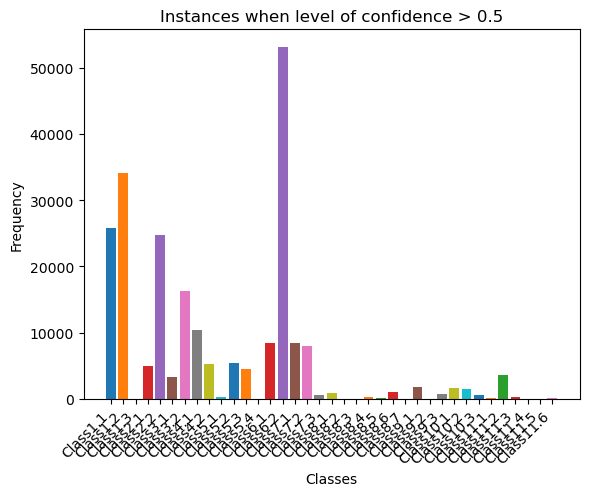

In [53]:
num_columns = len(filtered_df.columns)
x = np.arange(num_columns)
width = 0.8


fig, ax = plt.subplots()
for i, column in enumerate(filtered_df.columns):
    ax.bar(x[i], filtered_df[column].count(), width, label=column)

ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')
ax.set_title('Instances when level of confidence > {}'.format(0.5))
ax.set_xticks(x )
ax.set_xticklabels(filtered_df.columns, rotation=45, ha='right')  


plt.show()



Notice that two classes with most responses of high confidence level are 1 and 6. We decided to reduce our features based on this observation and selected classes 1.1,1.2 and 6.1 . These three features will be used to determine if a galaxy is elliptical,spiral or odd

In [54]:
pd.set_option('display.max_columns',None)
labels=labels.drop(labels[labels['Class1.3'] > 0.5].index)

In [73]:
labels = labels[['GalaxyID', 'Class1.1', 'Class1.2', 'Class6.1']]
labels['Result'] = 'i'
labels.loc[(labels['Class1.1'] > 0.7 ) & (labels['Class1.2'] < 0.3 ) & (labels['Class6.1'] < 0.1 ), 'Result'] = 'e'
labels.loc[(labels['Class1.1'] < 0.3 ) & (labels['Class1.2'] > 0.7 ) & (labels['Class6.1'] < 0.1 ) , 'Result'] = 's'
labels.loc[ (labels['Class6.1'] > 0.63 ), 'Result'] = 'o'



In [65]:
labels.head()

,GalaxyID,Class1.1,Class1.2,Class6.1,Result
0,100008,0.383147,0.616853,0.054453,i
1,100023,0.327001,0.663777,0.189149,i
2,100053,0.765717,0.177352,0.000000,e
3,100078,0.693377,0.238564,0.320398,i
4,100090,0.933839,0.000000,0.029383,e


In [61]:
labels.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61534 entries, 0 to 61577
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GalaxyID  61534 non-null  int64  
 1   Class1.1  61534 non-null  float64
 2   Class1.2  61534 non-null  float64
 3   Class6.1  61534 non-null  float64
 4   Result    61534 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.8+ MB


We further reduced our data set and by taking 5000 values of each of the three selected classes so as to be computationally efficient, ending up with 15000 rows of sample data.

In [74]:
elip_df = labels[labels['Result'] == 'e']
spiral_df = labels[labels['Result'] == 's']
odd_df = labels[labels['Result'] == 'o']

# Sample 5000 values from each category
category1_sampled = elip_df.sample(n=5000, random_state=42)
category2_sampled = spiral_df.sample(n=5000, random_state=42)
category3_sampled = odd_df.sample(n=5000, random_state=42)

# Concatenate the sampled DataFrames back together
sampled_df = pd.concat([category1_sampled, category2_sampled, category3_sampled])

galaxy =  sampled_df.sort_values(by='GalaxyID')

print(galaxy)


       GalaxyID  Class1.1  Class1.2  Class6.1 Result
2        100053  0.765717  0.177352  0.000000      e
6        100123  0.462492  0.456033  0.687647      o
16       100263  0.179654  0.818530  0.913055      o
19       100322  0.091987  0.908013  0.000000      s
30       100458  0.820908  0.081499  0.921161      o
...         ...       ...       ...       ...    ...
61564    999781  0.848000  0.064000  0.047000      e
61568    999875  0.020285  0.979715  0.071272      s
61570    999893  0.410999  0.519560  0.801448      o
61575    999958  0.202841  0.777376  0.839186      o
61576    999964  0.091000  0.909000  0.864000      o

[15000 rows x 5 columns]


In [75]:
# Filter rows where 'Result' is 'o'
result_o = labels[(labels['Result'] == 'o')  ]

# Display the resulting DataFrame
print(result_o)


       GalaxyID  Class1.1  Class1.2  Class6.1 Result
6        100123  0.462492  0.456033  0.687647      o
16       100263  0.179654  0.818530  0.913055      o
30       100458  0.820908  0.081499  0.921161      o
34       100513  0.275971  0.700977  0.881950      o
35       100520  0.042430  0.957570  0.887464      o
...         ...       ...       ...       ...    ...
61503    998662  0.719718  0.224321  0.777993      o
61509    998789  0.730443  0.239014  0.881488      o
61570    999893  0.410999  0.519560  0.801448      o
61575    999958  0.202841  0.777376  0.839186      o
61576    999964  0.091000  0.909000  0.864000      o

[5217 rows x 5 columns]


In [28]:
labels=labels.drop(labels[labels['Result'] == 'i'].index)
print(labels)

       GalaxyID  Class1.1  Class1.2  Class6.1 Result
2        100053  0.765717  0.177352  0.000000      e
4        100090  0.933839  0.000000  0.029383      e
5        100122  0.738832  0.238159  0.197930      e
6        100123  0.462492  0.456033  0.687647      o
14       100237  0.164391  0.800759  0.132726      s
...         ...       ...       ...       ...    ...
61568    999875  0.020285  0.979715  0.071272      s
61570    999893  0.410999  0.519560  0.801448      o
61574    999950  0.901216  0.098784  0.127644      e
61575    999958  0.202841  0.777376  0.839186      o
61576    999964  0.091000  0.909000  0.864000      o

[26087 rows x 5 columns]


In [43]:
galaxy_ids = labels['GalaxyID'].to_numpy()

# Display the array of GalaxyID
print(galaxy_ids)

[100090 100134 100237 ... 999950 999958 999964]


In [ ]:
from PIL import Image, ImageOps
from numpy import asarray
import os

folder_path = "Galaxy_data/images_training_rev1/"
output_dict = {}

for galaxy_id in galaxy_ids:
    filename = f"{galaxy_id}.jpg"
    filepath = os.path.join(folder_path, filename)

    if os.path.exists(filepath):
        # load the image and convert into numpy array
        img = Image.open(filepath)
        img_gray = ImageOps.grayscale(img)
        numpydata = asarray(img_gray).flatten()

        # store the numpy array in the dictionary with the galaxy_id as the key
        output_dict[galaxy_id] = numpydata

# Now output_dict contains numpy arrays for all specified galaxy IDs


In [ ]:
import numpy as np
x=np.array(list(output_dict.values())).mean()

In [ ]:
#import csv


# Specify the CSV file path
#csv_file_path = 'galaxy.csv'

# Writing the data to the CSV file
#with open(csv_file_path, 'w', newline='') as csv_file:
#    csv_writer = csv.writer(csv_file)

    # Write the header row with keys as column names
#    header = ['GalaxyID'] + [f'Pixel_{i}' for i in range(len(output_dict[100008].ravel()))]
#    csv_writer.writerow(header)

    # Write data rows
#    for key, value in output_dict.items():
        # Flatten the array to a 1D list for the row
#        row_data = [key] + value.ravel().tolist()
#        csv_writer.writerow(row_data)

#print(f'CSV file has been created at: {csv_file_path}')


In [ ]:
output_dict[100008]

In [ ]:
len(output_dict[100008].ravel())

424.0